In [2]:
import os
os.system("pip install --upgrade scikit-learn==0.23.2")

1

In [10]:
random_state = np.random.RandomState(seed=1)
X = np.concatenate([random_state.normal(9, 5, 350),
                    random_state.normal(20, 1, 600),
                    random_state.normal(30, 5, 2000)]).reshape(-1, 1)
np.save("formationchannels.npy",X)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

Text(0.5, 0, 'M$_{BH}$')

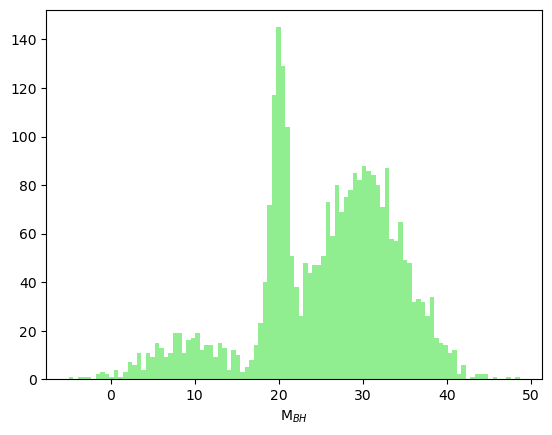

In [21]:
plt.hist(X, bins=100, color="lightgreen")
plt.xlabel("M$_{BH}$")

In [24]:
Ns = np.arange(1, 10)
models=[GaussianMixture(N).fit(X) for N in Ns]

In [25]:
AIC = [m.aic(X) for m in models]

Text(0, 0.5, 'information criterion')

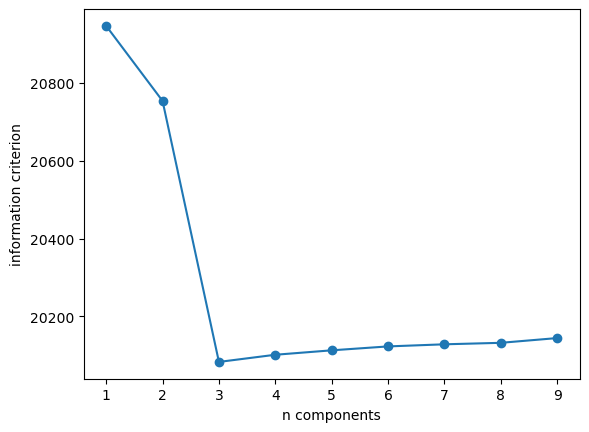

In [27]:
plt.plot(Ns, AIC,)
plt.scatter(Ns, AIC)

plt.xlabel('n components')
plt.ylabel('information criterion')

In [29]:
print('The AIC is minimized for N =', Ns[np.argmin(AIC)])

The AIC is minimized for N = 3


Text(0.5, 0, 'Black hole mass $[M_\\odot]$')

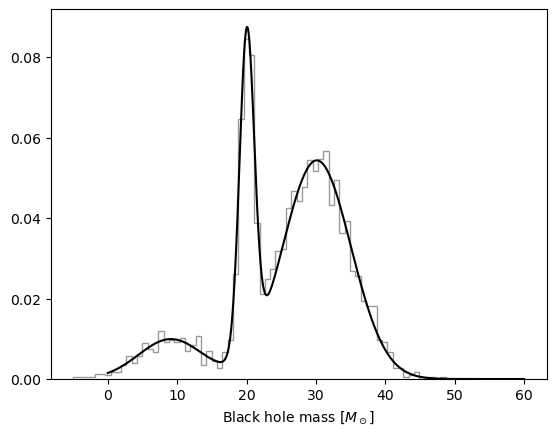

In [30]:
M_best = models[np.argmin(AIC)]

x = np.linspace(0, 60, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)

plt.hist(X, 70, density=True, histtype='step', alpha=0.4,color='black')

plt.plot(x, pdf, 'k')

plt.xlabel("Black hole mass $[M_\odot]$")

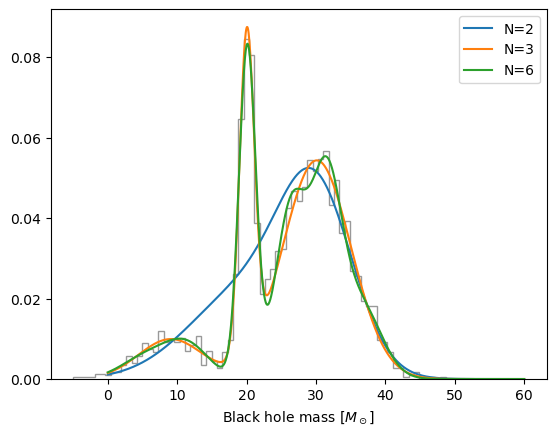

In [31]:
plt.hist(X, 70, density=True, histtype='step', alpha=0.4,color='black')

for index in np.argmin(AIC)+np.array([-1,0,3]):

    logprob = models[index].score_samples(x.reshape(-1, 1))
    plt.plot(x, np.exp(logprob),label='N='+str(Ns[index]))

plt.xlabel("Black hole mass $[M_\odot]$")
plt.legend()